In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open('data/WA_Fn-UseC_-Telco-Customer-Churn.csv') as f:
    df = pd.read_csv(f)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df = df.drop(['SeniorCitizen', 'customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport'], axis = 1)

In [7]:
df.head(2)

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,No,One year,No,Mailed check,56.95,1889.5,No


In [8]:
df.shape

(7043, 16)

### Data debugging

In [9]:
df[df.duplicated()].head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,No,No,1,Yes,No,DSL,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,No,No,1,Yes,No,Fiber optic,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No


In [10]:
len(df[df.duplicated()])

26

In [11]:
df = df.drop_duplicates()

In [12]:
df.head(2)

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,No,One year,No,Mailed check,56.95,1889.5,No


In [13]:
df.shape

(7017, 16)

<AxesSubplot:>

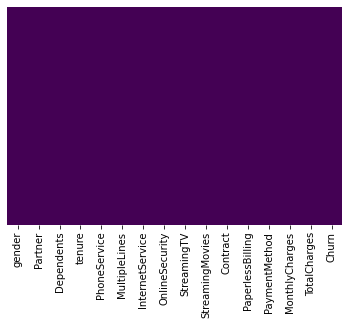

In [14]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [15]:
df.isnull().sum()

gender              0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.TotalCharges[480: 490]

480     225.75
481       2145
482     1671.6
483     8003.8
484     680.05
485    6130.85
486       1415
487    6201.95
488           
489      74.35
Name: TotalCharges, dtype: object

In [17]:
re.match(r'(\d+\.\d+)$', '6130.85')[0]

'6130.85'

In [18]:
def value(x):
    if x == '':
        return x.replace('', '0.0')
    match = re.match(r'(\d+\.\d+)$', str(x))
    if match is not None:
        return np.float64(match[0])

In [19]:
df['TotalCharges'] = df.TotalCharges.apply(value)

In [20]:
df.TotalCharges[480: 490]

480     225.75
481        NaN
482    1671.60
483    8003.80
484     680.05
485    6130.85
486        NaN
487    6201.95
488        NaN
489      74.35
Name: TotalCharges, dtype: float64

In [21]:
df.TotalCharges.isnull().sum()

334

<AxesSubplot:>

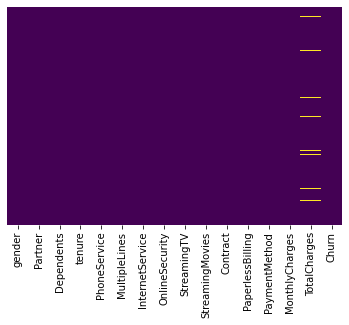

In [22]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Churn', ylabel='count'>

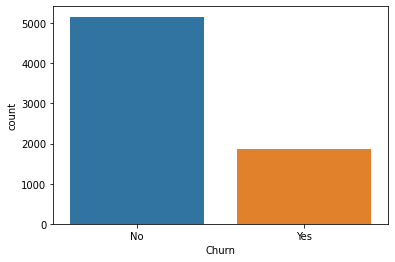

In [23]:
sns.countplot(x = 'Churn', data = df)

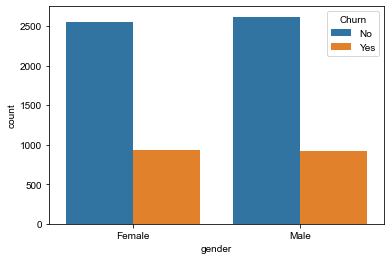

In [24]:
sns.countplot(x = 'gender', hue = 'Churn', data = df)
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Contract', ylabel='count'>

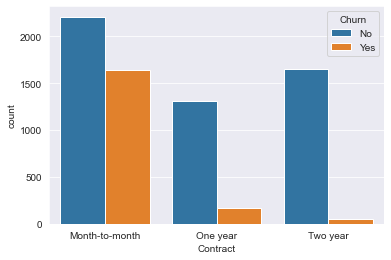

In [25]:
sns.countplot(x = 'Contract', hue = 'Churn', data = df)

<AxesSubplot:xlabel='InternetService', ylabel='TotalCharges'>

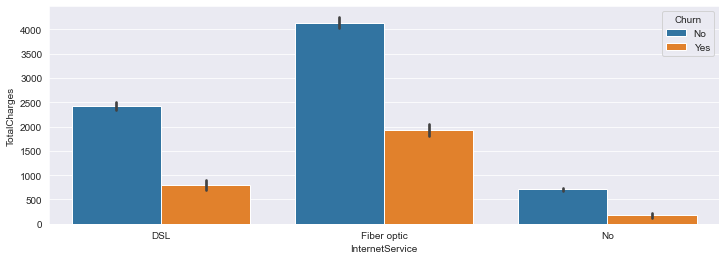

In [26]:
plt.figure(figsize = (12, 4))
sns.barplot(x = 'InternetService', y = 'TotalCharges', hue = 'Churn', data = df)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

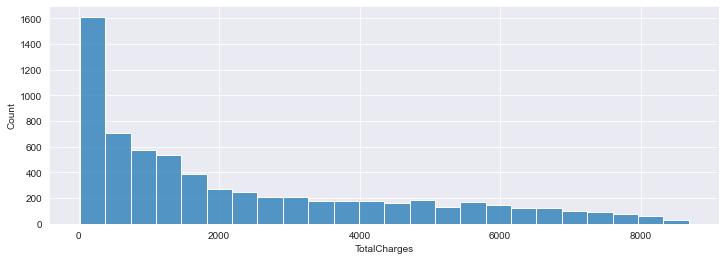

In [27]:
plt.figure(figsize = (12, 4))
sns.histplot(df.TotalCharges)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

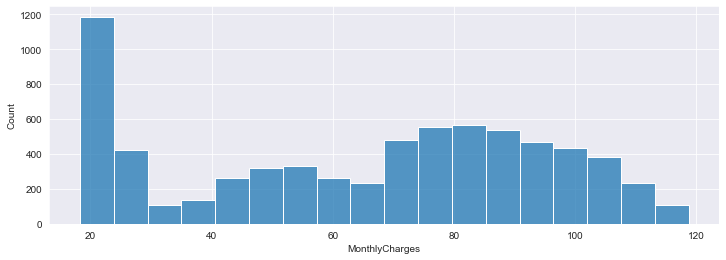

In [28]:
plt.figure(figsize = (12, 4))
sns.histplot(df.MonthlyCharges)

<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

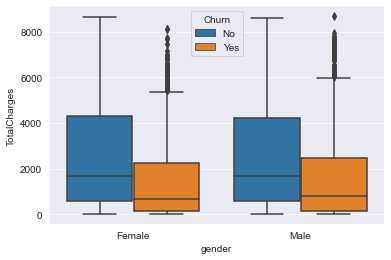

In [29]:
sns.boxplot(x = 'gender', y = 'TotalCharges', hue = 'Churn', data = df)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

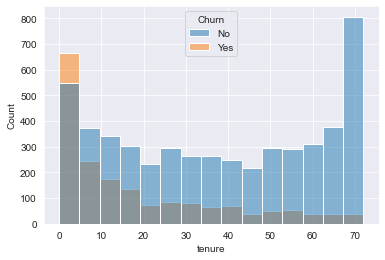

In [30]:
sns.histplot(x = 'tenure', hue = 'Churn', data = df)

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

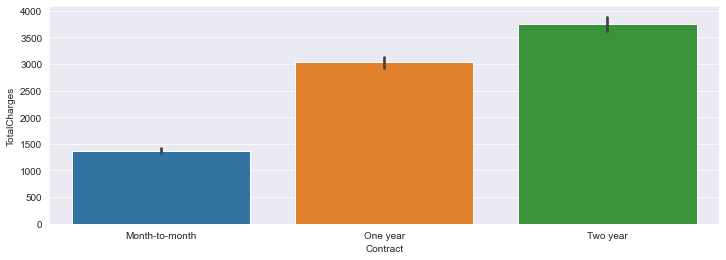

In [31]:
plt.figure(figsize = (12, 4))
sns.barplot(x = 'Contract', y = 'TotalCharges', data = df)

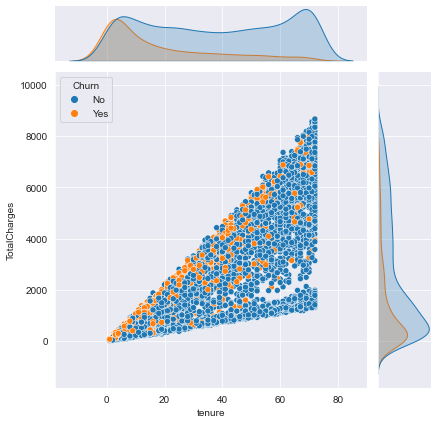

In [32]:
sns.jointplot(x = 'tenure', y = 'TotalCharges', hue = 'Churn', data = df)

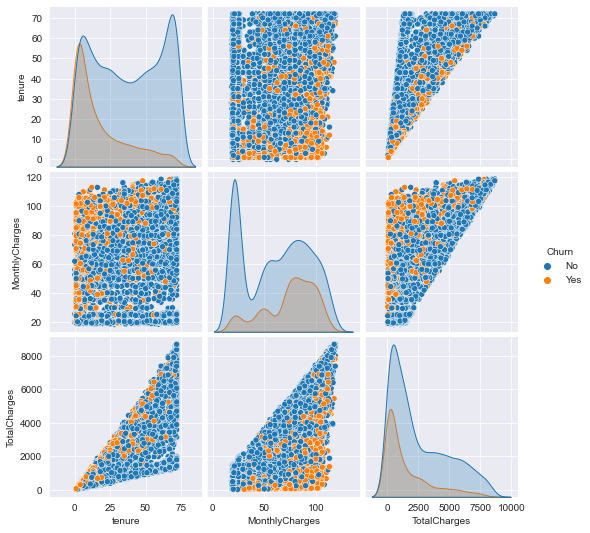

In [33]:
sns.pairplot(df, hue = 'Churn')

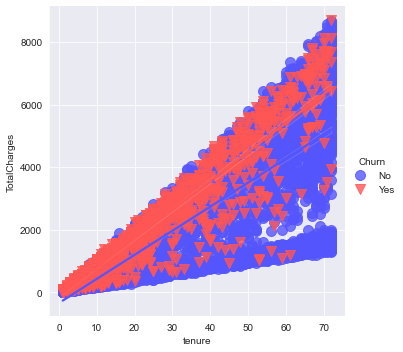

In [34]:
sns.lmplot(x = 'tenure', y = 'TotalCharges', hue = 'Churn', palette= 'seismic', markers= ['o', 'v'], scatter_kws = {'s': 100}, data = df)

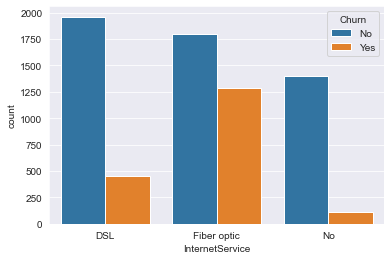

In [35]:
sns.countplot(x = 'InternetService', hue = 'Churn', data = df)
sns.set_style('darkgrid')

<AxesSubplot:>

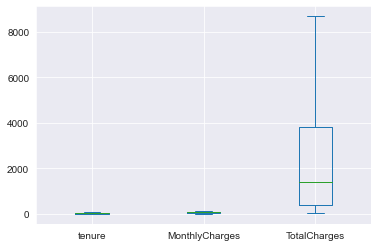

In [36]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].plot.box()

In [37]:
df[df == 0].count()

gender               0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

In [38]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].skew()

tenure            0.234816
MonthlyCharges   -0.224491
TotalCharges      0.962205
dtype: float64

In [39]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].kurtosis()

tenure           -1.388216
MonthlyCharges   -1.254085
TotalCharges     -0.231811
dtype: float64

In [40]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [41]:
df.head(2)

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,No,One year,No,Mailed check,56.95,1889.50,No


## Dealing with missing data

In [42]:
df.TotalCharges = df.TotalCharges.fillna(value = np.round(df.TotalCharges.median(),2))

In [43]:
df.isnull().sum()

gender              0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

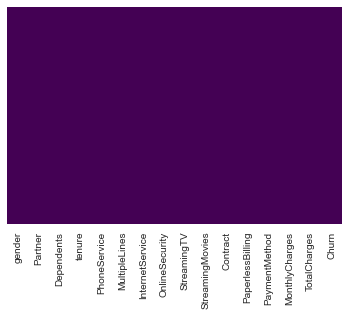

In [44]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [45]:
Gender = pd.get_dummies(df.gender, drop_first= True)

In [46]:
partner = pd.get_dummies(df.Partner, drop_first = True)

In [47]:
dependents = pd.get_dummies(df.Dependents, drop_first = True)

In [48]:
phone_service = pd.get_dummies(df.PhoneService, drop_first = True)

In [49]:
multiple_lines = pd.get_dummies(df.MultipleLines, drop_first= True)

In [50]:
internet_service = pd.get_dummies(df.InternetService, drop_first= True)

In [51]:
online_security = pd.get_dummies(df.OnlineSecurity, drop_first= True)

In [52]:
streaming_tv = pd.get_dummies(df.StreamingTV, drop_first= True)

In [53]:
streaming_movies = pd.get_dummies(df.StreamingMovies, drop_first= True)

In [54]:
paperless_billing = pd.get_dummies(df.PaymentMethod, drop_first= True)

In [55]:
payment_method = pd.get_dummies(df.PaymentMethod, drop_first= True)

In [56]:
df = pd.concat([df, Gender, partner, dependents, phone_service, multiple_lines, internet_service, online_security, streaming_tv, streaming_movies, paperless_billing, payment_method], axis = 1)

In [57]:
df.head(2)

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,StreamingTV,StreamingMovies,...,No internet service,Yes,No internet service,Yes,Credit card (automatic),Electronic check,Mailed check,Credit card (automatic),Electronic check,Mailed check
0,Female,Yes,No,1,No,No phone service,DSL,No,No,No,...,0,0,0,0,0,1,0,0,1,0
1,Male,No,No,34,Yes,No,DSL,Yes,No,No,...,0,0,0,0,0,0,1,0,0,1


In [58]:
df.drop(['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'], axis = 1, inplace = True)

In [59]:
df.head(2)

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,Male,Yes,Yes,Yes,No phone service,...,No internet service,Yes,No internet service,Yes,Credit card (automatic),Electronic check,Mailed check,Credit card (automatic),Electronic check,Mailed check
0,1,Month-to-month,29.85,29.85,No,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,34,One year,56.95,1889.50,No,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [60]:
contract = pd.get_dummies(df.Contract, drop_first = True)

In [61]:
df = pd.concat([df, contract], axis = 1)

In [62]:
df = df.drop('Contract', axis = True)

In [63]:
df.head(2)

,tenure,MonthlyCharges,TotalCharges,Churn,Male,Yes,Yes,Yes,No phone service,Yes,...,No internet service,Yes,Credit card (automatic),Electronic check,Mailed check,Credit card (automatic),Electronic check,Mailed check,One year,Two year
0,1,29.85,29.85,No,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,34,56.95,1889.50,No,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scale = StandardScaler()

In [66]:
df1 = scale.fit_transform(df.drop('Churn', axis = 1))

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components= 12)

In [69]:
pca_x = pca.fit_transform(df1)

In [70]:
X = pca_x
y = df.Churn

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
from sklearn.svm import SVC

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
dtree = DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=300)
knn = KNeighborsClassifier()
svc = SVC()
lc = LogisticRegression()

In [79]:
dtree.fit(X_train, y_train)
clf.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
lc.fit(X_train, y_train)

LogisticRegression()

In [80]:
pred = dtree.predict(X_test)
preds = clf.predict(X_test)
prediction = knn.predict(X_test)
predictions = svc.predict(X_test)
predicts = lc.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [82]:
print('Decision Tree classification Accuracy Score: ', accuracy_score(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

Decision Tree classification Accuracy Score:  0.7257834757834758


[[856 200]
 [185 163]]


              precision    recall  f1-score   support

          No       0.82      0.81      0.82      1056
         Yes       0.45      0.47      0.46       348

    accuracy                           0.73      1404
   macro avg       0.64      0.64      0.64      1404
weighted avg       0.73      0.73      0.73      1404



[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

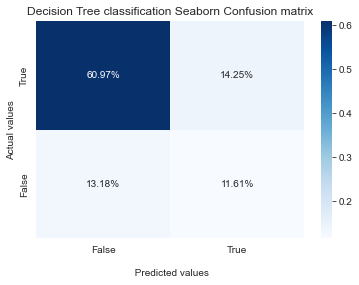

In [83]:
ax = sns.heatmap(confusion_matrix(y_test, pred)/ np.sum(confusion_matrix(y_test, pred)), annot = True, cmap = 'Blues', fmt = '.2%')
ax.set_title('Decision Tree classification Seaborn Confusion matrix')
ax.set_xlabel('\n Predicted values')
ax.set_ylabel('Actual values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['True', 'False'])

In [84]:
print('Random Forest classification Accuracy Score: ', accuracy_score(y_test, preds))
print('\n')
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

Random Forest classification Accuracy Score:  0.7663817663817664


[[915 141]
 [187 161]]


              precision    recall  f1-score   support

          No       0.83      0.87      0.85      1056
         Yes       0.53      0.46      0.50       348

    accuracy                           0.77      1404
   macro avg       0.68      0.66      0.67      1404
weighted avg       0.76      0.77      0.76      1404



[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

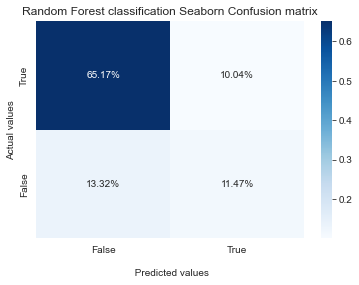

In [85]:
ax = sns.heatmap(confusion_matrix(y_test, preds)/ np.sum(confusion_matrix(y_test, preds)), annot = True, cmap = 'Blues', fmt = '.2%')
ax.set_title('Random Forest classification Seaborn Confusion matrix')
ax.set_xlabel('\n Predicted values')
ax.set_ylabel('Actual values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['True', 'False'])

In [86]:
print('KNeigbors classification Accuracy Score: ', accuracy_score(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

KNeigbors classification Accuracy Score:  0.7642450142450142


[[901 155]
 [176 172]]


              precision    recall  f1-score   support

          No       0.84      0.85      0.84      1056
         Yes       0.53      0.49      0.51       348

    accuracy                           0.76      1404
   macro avg       0.68      0.67      0.68      1404
weighted avg       0.76      0.76      0.76      1404



[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

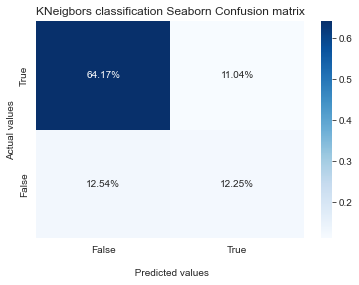

In [87]:
ax = sns.heatmap(confusion_matrix(y_test, prediction)/ np.sum(confusion_matrix(y_test, prediction)), annot = True, cmap = 'Blues', fmt = '.2%')
ax.set_title('KNeigbors classification Seaborn Confusion matrix')
ax.set_xlabel('\n Predicted values')
ax.set_ylabel('Actual values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['True', 'False'])

In [88]:
print('SVC Accuracy Score: ', accuracy_score(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

SVC Accuracy Score:  0.8076923076923077


[[951 105]
 [165 183]]


              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1056
         Yes       0.64      0.53      0.58       348

    accuracy                           0.81      1404
   macro avg       0.74      0.71      0.73      1404
weighted avg       0.80      0.81      0.80      1404



[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

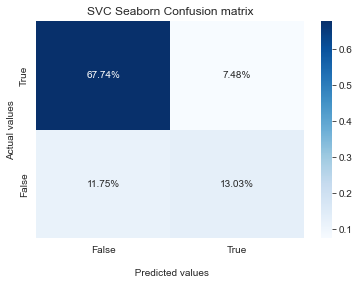

In [89]:
ax = sns.heatmap(confusion_matrix(y_test, predictions)/ np.sum(confusion_matrix(y_test, predictions)), annot = True, cmap = 'Blues', fmt = '.2%')
ax.set_title('SVC Seaborn Confusion matrix')
ax.set_xlabel('\n Predicted values')
ax.set_ylabel('Actual values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['True', 'False'])

In [90]:
print('Logistic Regression classification Accuracy Score: ', accuracy_score(y_test, predicts))
print('\n')
print(confusion_matrix(y_test, predicts))
print('\n')
print(classification_report(y_test, predicts))

Logistic Regression classification Accuracy Score:  0.8041310541310541


[[932 124]
 [151 197]]


              precision    recall  f1-score   support

          No       0.86      0.88      0.87      1056
         Yes       0.61      0.57      0.59       348

    accuracy                           0.80      1404
   macro avg       0.74      0.72      0.73      1404
weighted avg       0.80      0.80      0.80      1404



[Text(0, 0.5, 'True'), Text(0, 1.5, 'False')]

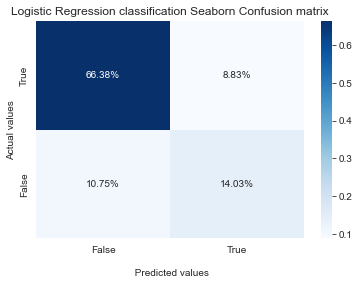

In [91]:
ax = sns.heatmap(confusion_matrix(y_test, predicts)/ np.sum(confusion_matrix(y_test, predicts)), annot = True, cmap = 'Blues', fmt = '.2%')
ax.set_title('Logistic Regression classification Seaborn Confusion matrix')
ax.set_xlabel('\n Predicted values')
ax.set_ylabel('Actual values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['True', 'False'])

## Explanatory Data Analysis (EDA)

Using Logistic regression model due to it's performance compared to the other models used and from the metrics classification report, the recall result captured the True positive and False negative (the proportion of True positive classified as Negative) which showed the actual proportion of those that are likely to churn and those that are loyal customers.

In [92]:
No = 0.88
Yes = 0.57

In [93]:
Total_Precision = No + Yes

In [94]:
Percentage_No = np.round((No/Total_Precision) * 100, 1)

In [95]:
Percentage_Yes = np.round((Yes/Total_Precision) * 100, 1)

In [96]:
print('Percentage of No: ', Percentage_No)
print('\n')
print('Percentage of Yes: ', Percentage_Yes)

Percentage of No:  60.7


Percentage of Yes:  39.3


In [97]:
result = pd.DataFrame({'Churn': ['No', 'Yes'],
                      'Rating (%)': [60.7, 39.3]})

In [98]:
result

,Churn,Rating (%)
0,No,60.7
1,Yes,39.3


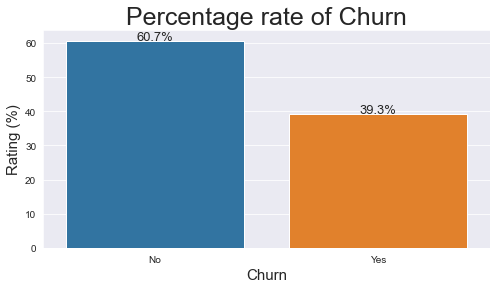

In [99]:
plt.figure(figsize = (8, 4))
ax = sns.barplot(x = 'Churn', y = 'Rating (%)', data = result)
plt.title('Percentage rate of Churn', fontsize = 25)
plt.xlabel('Churn', fontsize = 15)
plt.ylabel('Rating (%)', fontsize = 15)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + .05
    ax.annotate(percentage, (x, y), ha = 'center', size = 13)